In [34]:
from fastai import *
from fastai.basics import *
from fastai.vision import *

In [39]:
import warnings; warnings.simplefilter('ignore')

In [23]:
folder = 'ballet'
file = 'urls-ballet.txt'

In [27]:
folder = 'soccer'
file = 'urls-soccer.txt'

In [28]:
path = Path('data/exercise')
dest = path/folder
dest.mkdir(parents=True, exist_ok=True)

In [29]:
classes = ['ballet','soccer']

In [30]:
download_images(path/file, dest, max_pics=200)

In [31]:
for c in classes:
    print(c)
    verify_images(path/c, delete=True, max_workers=8)

ballet


soccer


In [40]:
np.random.seed(42)
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2, ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)

In [37]:
data.classes

['ballet', 'soccer']

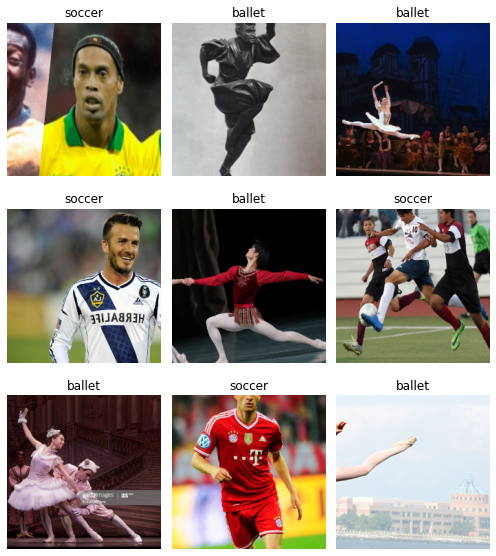

In [41]:
data.show_batch(rows=3, figsize = (7,8))

In [42]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds)

(['ballet', 'soccer'], 2, 310, 77)

In [43]:
learn = create_cnn(data,models.resnet34,metrics=error_rate)

In [57]:
learn.fit_one_cycle(3)

epoch,train_loss,valid_loss,error_rate,time
0,0.427001,93.964828,0.519481,01:04
1,0.358899,1.492655,0.051948,01:05
2,0.321667,0.413894,0.051948,01:03


In [58]:
learn.save('stage-1')

In [59]:
learn.unfreeze()

In [60]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


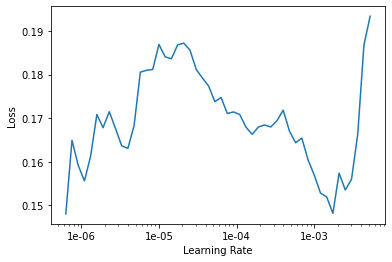

In [61]:
learn.recorder.plot()